In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
accounts = pd.read_csv("./processed/account.csv", sep=";");
#df_card_dev = pd.read_csv("./processed/card_dev.csv", sep=";");
#df_client = pd.read_csv("./processed/client.csv", sep=";");
#df_disp = pd.read_csv("./processed/disp.csv", sep=";");
#df_loan_dev = pd.read_csv("./processed/loan_dev.csv", sep=";");
#df_trans_dev = pd.read_csv("./processed/trans_dev.csv", sep=";", low_memory=False); # see here
#df_district = pd.read_csv("./raw/district.csv", sep=";");

#df_loan_dev['date'] = [datetime.strptime(d, "%Y-%m-%d") for d in df_loan_dev['date']]

In [3]:
accounts.head()

,account_id,district_id,frequency,date
0,576,55,monthly issuance,1993-01-01
1,3818,74,monthly issuance,1993-01-01
2,704,55,monthly issuance,1993-01-01
3,2378,16,monthly issuance,1993-01-01
4,2632,24,monthly issuance,1993-01-02


In [4]:
accounts.shape

(4500, 4)

In [5]:
transactions = pd.read_csv("./processed/trans_dev.csv", sep=";", low_memory=False);

In [6]:
transactions.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,1993-01-13,credit,credit in cash,800.0,800.0,NaN,NaN,NaN
1,1548750,5270,1993-01-14,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0
2,3393738,11265,1993-01-14,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,3122924,10364,1993-01-17,credit,credit in cash,1100.0,1100.0,NaN,NaN,NaN
4,1121963,3834,1993-01-19,credit,credit in cash,700.0,700.0,NaN,NaN,NaN


In [7]:
accounts = accounts.rename(columns={"date": "account_date"})
transactions = transactions.rename(columns={"date": "transaction_date", "amount": "transaction_amount", "account": "bank_account"})

In [8]:
all_join = accounts
all_join.head()

,account_id,district_id,frequency,account_date
0,576,55,monthly issuance,1993-01-01
1,3818,74,monthly issuance,1993-01-01
2,704,55,monthly issuance,1993-01-01
3,2378,16,monthly issuance,1993-01-01
4,2632,24,monthly issuance,1993-01-02


In [9]:
transactions.groupby('account_id').size()

account_id
1        113
2         54
4         39
6        124
7          4
        ... 
11333    208
11349     18
11359    147
11362    107
11382     99
Length: 3370, dtype: int64

In [10]:
temp = transactions.groupby('account_id').size()
temp_pd = pd.DataFrame(temp)

In [11]:
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join.head()
all_join.shape

(4500, 5)

In [12]:
all_join = all_join.rename(columns={0: "# transactions"})
all_join.head()

,account_id,district_id,frequency,account_date,# transactions
0,576,55,monthly issuance,1993-01-01,229.0
1,3818,74,monthly issuance,1993-01-01,366.0
2,704,55,monthly issuance,1993-01-01,320.0
3,2378,16,monthly issuance,1993-01-01,307.0
4,2632,24,monthly issuance,1993-01-02,368.0


In [13]:
temp = transactions[transactions['operation']=='credit in cash'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)

In [14]:
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# credit in cash transactions"})
# all_join.head()

In [15]:
temp = transactions[transactions['operation']=='credit card withdrawal'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# credit card withdrawal transactions"})
# all_join.head()

In [16]:
temp = transactions[transactions['operation']=='collection from another bank'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# collection from another bank withdrawal transactions"})
# all_join.head()

In [17]:
temp = transactions[transactions['operation']=='remittance to another bank'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# remittance to another bank withdrawal transactions"})
# all_join.head()

In [18]:
temp = transactions[transactions['operation']=='withdrawal in cash'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# withdrawal in cash transactions"})
# all_join.head()

In [19]:
temp = transactions[transactions['type']=='withdrawal'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# type = withdrawal transactions"})
# all_join.head()

In [20]:
temp = transactions[transactions['type']=='withdrawal in cash'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# type = withdrawal in cash transactions"})
# all_join.head()

In [21]:
temp = transactions[transactions['type']=='credit'].groupby('account_id').size()
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={0: "# type = credit transactions"})
all_join.head()

,account_id,district_id,frequency,account_date,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,# type = withdrawal in cash transactions,# type = credit transactions
0,576,55,monthly issuance,1993-01-01,229.0,1.0,NaN,48.0,44.0,88.0,132.0,NaN,97.0
1,3818,74,monthly issuance,1993-01-01,366.0,53.0,NaN,NaN,132.0,133.0,265.0,NaN,101.0
2,704,55,monthly issuance,1993-01-01,320.0,50.0,NaN,NaN,86.0,136.0,222.0,NaN,98.0
3,2378,16,monthly issuance,1993-01-01,307.0,84.0,NaN,NaN,47.0,128.0,164.0,11.0,132.0
4,2632,24,monthly issuance,1993-01-02,368.0,50.0,NaN,NaN,130.0,140.0,270.0,NaN,98.0


In [22]:
temp = transactions.groupby('account_id').transaction_amount.mean().round(2)
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={'transaction_amount': "avg transaction amount"})

In [23]:
all_join.shape

(4500, 14)

In [24]:
temp = transactions.groupby('account_id').balance.mean().round(2)
temp_pd = pd.DataFrame(temp)
all_join = pd.merge(all_join, temp_pd, right_index=True, left_on='account_id', how="outer")
all_join = all_join.rename(columns={'balance': "avg balance"})
all_join

,account_id,district_id,frequency,account_date,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,# type = withdrawal in cash transactions,# type = credit transactions,avg transaction amount,avg balance
0,576,55,monthly issuance,1993-01-01,229.0,1.0,NaN,48.0,44.0,88.0,132.0,NaN,97.0,2480.36,24283.20
1,3818,74,monthly issuance,1993-01-01,366.0,53.0,NaN,NaN,132.0,133.0,265.0,NaN,101.0,4908.71,42826.89
2,704,55,monthly issuance,1993-01-01,320.0,50.0,NaN,NaN,86.0,136.0,222.0,NaN,98.0,5622.88,34748.26
3,2378,16,monthly issuance,1993-01-01,307.0,84.0,NaN,NaN,47.0,128.0,164.0,11.0,132.0,13644.92,57997.03
4,2632,24,monthly issuance,1993-01-02,368.0,50.0,NaN,NaN,130.0,140.0,270.0,NaN,98.0,4028.79,32355.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,124,55,monthly issuance,1997-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4496,3958,59,monthly issuance,1997-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4497,777,30,monthly issuance,1997-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4498,1573,63,monthly issuance,1997-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


k_symbol, bank and (bank_)account columns were skipped due to the fact that they seem to be other identifiers of an account (which is redundant)

#### Exporting join of accounts and transactions files

In [25]:
# all_join.to_csv("./processed/all_join_1.csv", sep=";")

#### Loans dataset

In [26]:
loans = pd.read_csv("./processed/loan_dev.csv", sep=";");

In [27]:
loans.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033,-1
1,5316,1801,1993-07-11,165960,36,4610,1
2,6863,9188,1993-07-28,127080,60,2118,1
3,5325,1843,1993-08-03,105804,36,2939,1
4,7240,11013,1993-09-06,274740,60,4579,1


In [28]:
loans.shape

(328, 7)

In [29]:
loans.rename(columns={'date': "loan date", 'amount': "loan amount", 'duration': "loan duration", 'payments': "loan payments", 'status': "loan status"})

,loan_id,account_id,loan date,loan amount,loan duration,loan payments,loan status
0,5314,1787,1993-07-05,96396,12,8033,-1
1,5316,1801,1993-07-11,165960,36,4610,1
2,6863,9188,1993-07-28,127080,60,2118,1
3,5325,1843,1993-08-03,105804,36,2939,1
4,7240,11013,1993-09-06,274740,60,4579,1
...,...,...,...,...,...,...,...
323,6818,9030,1996-12-12,155616,48,3242,1
324,5625,3189,1996-12-15,222180,60,3703,-1
325,6805,8972,1996-12-21,45024,48,938,1
326,7233,10963,1996-12-25,115812,36,3217,1


In [30]:
loans.account_id.nunique()

328

Therefore, there is at max 1 loan per account in this data. No need for average loan values, loan durations, etc

In [31]:
all_join_only_loan_accounts = pd.merge(all_join, loans)
all_join_only_loan_accounts.shape

(328, 21)

In [32]:
all_join_only_loan_accounts.head()

,account_id,district_id,frequency,account_date,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,...,# type = withdrawal in cash transactions,# type = credit transactions,avg transaction amount,avg balance,loan_id,date,amount,duration,payments,status
0,5270,44,monthly issuance,1993-01-13,53.0,1.0,NaN,11.0,NaN,31.0,...,3.0,22.0,17600.36,69954.57,6077,1993-11-22,79608,24,3317,1
1,11265,15,monthly issuance,1993-01-14,43.0,14.0,NaN,NaN,8.0,14.0,...,NaN,21.0,3714.90,22198.18,7284,1993-09-15,52788,12,4399,1
2,10364,55,monthly issuance,1993-01-17,45.0,12.0,NaN,NaN,5.0,19.0,...,NaN,21.0,5957.54,34272.21,7121,1993-11-10,21924,36,609,1
3,3834,54,monthly issuance,1993-01-19,171.0,29.0,NaN,NaN,61.0,62.0,...,NaN,48.0,3618.33,23771.97,5754,1994-09-28,23052,12,1921,1
4,9307,68,monthly issuance,1993-01-24,143.0,26.0,NaN,NaN,30.0,50.0,...,4.0,63.0,6720.90,36080.39,6895,1994-09-19,41904,12,3492,1


In [33]:
all_join_only_loan_accounts = all_join_only_loan_accounts.drop(columns=['account_date'])
all_join_only_loan_accounts = all_join_only_loan_accounts.rename(columns={'date': "loan date"})

### Some Analysis

In [34]:
temp_all_join_only_loan_accounts = all_join_only_loan_accounts.drop(columns=['account_id', 'district_id'])

In [35]:
temp_all_join_only_loan_accounts.columns

Index(['frequency', '# transactions', '# credit in cash transactions',
       '# credit card withdrawal transactions',
       '# collection from another bank withdrawal transactions',
       '# remittance to another bank withdrawal transactions',
       '# withdrawal in cash transactions', '# type = withdrawal transactions',
       '# type = withdrawal in cash transactions',
       '# type = credit transactions', 'avg transaction amount', 'avg balance',
       'loan_id', 'loan date', 'amount', 'duration', 'payments', 'status'],
      dtype='object')

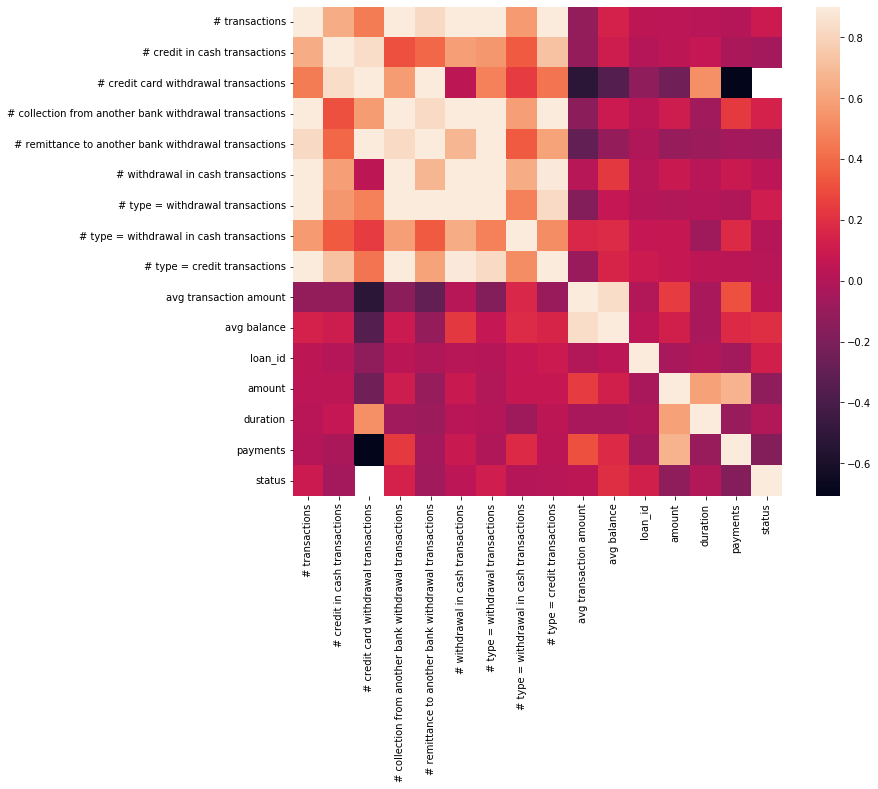

In [36]:
#correlation matrix
corrmat = temp_all_join_only_loan_accounts.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

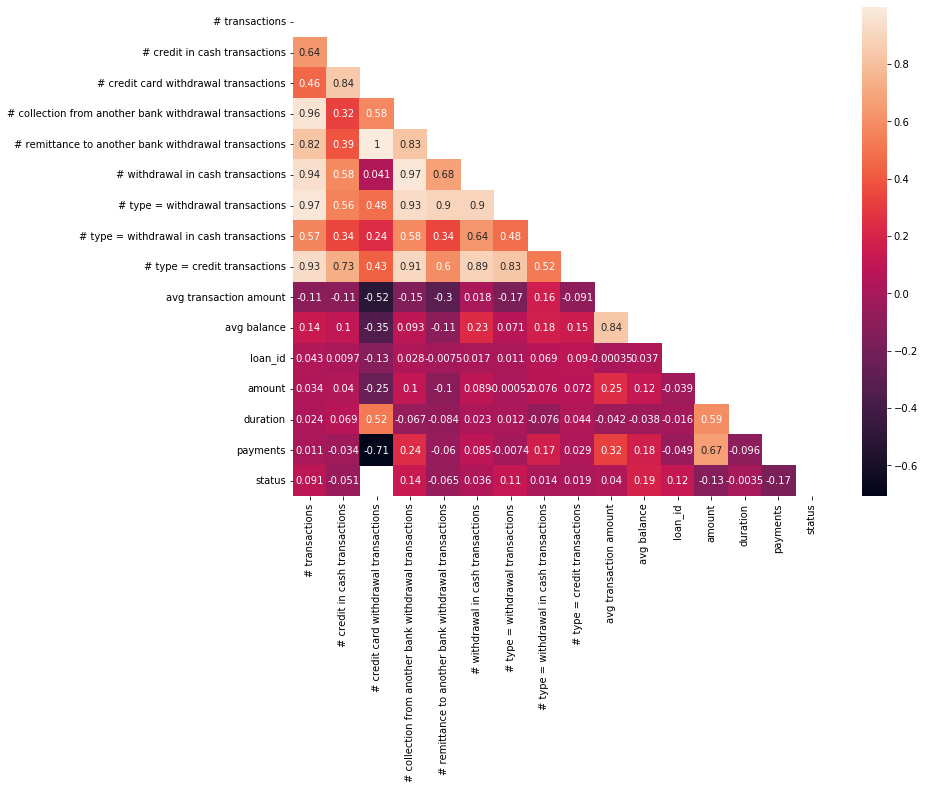

In [37]:
corrmat = temp_all_join_only_loan_accounts.corr()
f, ax = plt.subplots(figsize=(12, 9))
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corrmat)

# using the upper triangle matrix as mask 
sns.heatmap(corrmat, annot=True, mask=matrix)

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


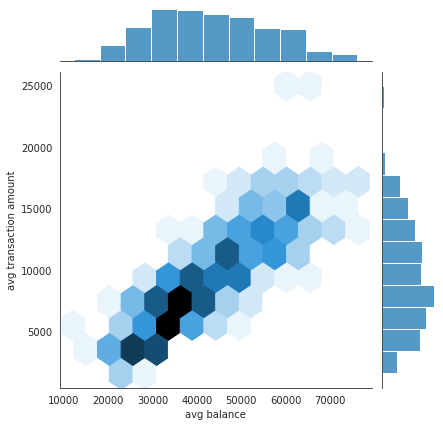

In [38]:
with sns.axes_style('white'):
    sns.jointplot("avg balance", "avg transaction amount", temp_all_join_only_loan_accounts, kind='hex')

In [39]:
#with sns.axes_style('white'):
#    sns.jointplot("status", "payments", temp_all_join_only_loan_accounts, kind='hex')

#### Districts dataset

In [40]:
districts = pd.read_csv("./raw/district.csv", sep=";");

In [41]:
districts = districts.rename(columns={"code ": "district_id", "name ": "district_name", "region": "district_region"})

In [42]:
districts.head()

,district_id,district_name,district_region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [43]:
districts.shape

(77, 16)

In [44]:
all_join_only_loan_accounts.shape

(328, 20)

In [45]:
all_join_loan_accounts_district = pd.merge(all_join_only_loan_accounts, districts)
all_join_loan_accounts_district

,account_id,district_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,...,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,5270,44,monthly issuance,53.0,1.0,NaN,11.0,NaN,31.0,28.0,...,7,2,7,53.0,8254,2.79,3.76,97,2166,2325
1,5385,44,weekly issuance,56.0,3.0,NaN,10.0,6.0,27.0,32.0,...,7,2,7,53.0,8254,2.79,3.76,97,2166,2325
2,8027,44,weekly issuance,60.0,2.0,NaN,10.0,NaN,38.0,33.0,...,7,2,7,53.0,8254,2.79,3.76,97,2166,2325
3,3037,44,monthly issuance,117.0,26.0,NaN,NaN,NaN,71.0,70.0,...,7,2,7,53.0,8254,2.79,3.76,97,2166,2325
4,10942,44,weekly issuance,130.0,40.0,NaN,NaN,12.0,62.0,72.0,...,7,2,7,53.0,8254,2.79,3.76,97,2166,2325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4462,73,weekly issuance,10.0,4.0,NaN,NaN,NaN,3.0,3.0,...,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
324,5001,53,monthly issuance,82.0,27.0,NaN,NaN,6.0,39.0,41.0,...,6,2,7,50.9,8240,2.53,3.56,99,1850,1903
325,3084,59,weekly issuance,29.0,8.0,NaN,NaN,NaN,15.0,13.0,...,7,2,6,62.1,8444,3.24,3.47,106,2595,2305
326,11054,59,weekly issuance,31.0,3.0,NaN,7.0,3.0,12.0,14.0,...,7,2,6,62.1,8444,3.24,3.47,106,2595,2305


In [46]:
all_join_loan_accounts_district[all_join_loan_accounts_district['status'] == -1]

,account_id,district_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,...,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
3,3037,44,monthly issuance,117.0,26.0,NaN,NaN,NaN,71.0,70.0,...,7,2,7,53.0,8254,2.79,3.76,97,2166,2325
6,5927,15,monthly issuance,33.0,3.0,NaN,6.0,NaN,12.0,11.0,...,7,1,5,51.9,9045,3.13,3.60,124,1845,1879
16,790,54,monthly issuance,64.0,16.0,NaN,NaN,NaN,35.0,34.0,...,0,1,1,100.0,9897,1.60,1.96,140,18721,18696
17,10266,54,monthly issuance,23.0,6.0,NaN,NaN,NaN,8.0,8.0,...,0,1,1,100.0,9897,1.60,1.96,140,18721,18696
27,1993,68,monthly issuance,14.0,4.0,NaN,NaN,NaN,5.0,5.0,...,18,2,6,57.2,9893,4.09,4.72,96,5623,5887
30,6473,12,monthly issuance,102.0,26.0,NaN,NaN,NaN,60.0,52.0,...,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
43,3678,1,monthly issuance,139.0,38.0,NaN,NaN,NaN,79.0,79.0,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
53,11021,1,monthly issuance,160.0,36.0,NaN,NaN,NaN,86.0,78.0,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
54,10451,1,monthly issuance,130.0,26.0,NaN,NaN,34.0,40.0,74.0,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
60,10131,1,monthly issuance,15.0,3.0,NaN,NaN,NaN,5.0,5.0,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107


In [47]:
all_join_loan_accounts_district = all_join_loan_accounts_district.drop(columns=['no. of cities ', 'no. of municipalities with inhabitants < 499 ', 'no. of municipalities with inhabitants 500-1999', 'no. of municipalities with inhabitants 2000-9999 ', 'no. of municipalities with inhabitants >10000 '])



In [48]:
all_join_loan_accounts_district.columns

Index(['account_id', 'district_id', 'frequency', '# transactions',
       '# credit in cash transactions',
       '# credit card withdrawal transactions',
       '# collection from another bank withdrawal transactions',
       '# remittance to another bank withdrawal transactions',
       '# withdrawal in cash transactions', '# type = withdrawal transactions',
       '# type = withdrawal in cash transactions',
       '# type = credit transactions', 'avg transaction amount', 'avg balance',
       'loan_id', 'loan date', 'amount', 'duration', 'payments', 'status',
       'district_name', 'district_region', 'no. of inhabitants',
       'ratio of urban inhabitants ', 'average salary ',
       'unemploymant rate '95 ', 'unemploymant rate '96 ',
       'no. of enterpreneurs per 1000 inhabitants ',
       'no. of commited crimes '95 ', 'no. of commited crimes '96 '],
      dtype='object')

In [49]:
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["no. of commited crimes '95 "] == '?', "no. of commited crimes '95 "] = -1



In [50]:
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["no. of commited crimes '96 "] == '?', "no. of commited crimes '96 "] = -1





In [51]:
# Fix
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["no. of commited crimes '95 "].astype('int') == -1, 'crimes'] = all_join_loan_accounts_district["no. of commited crimes '96 "].astype('int')
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["no. of commited crimes '95 "].astype('int') != -1, 'crimes'] = (all_join_loan_accounts_district["no. of commited crimes '95 "].astype('int') + all_join_loan_accounts_district["no. of commited crimes '96 "].astype('int')) / 2.0



In [52]:
all_join_loan_accounts_district = all_join_loan_accounts_district.drop(columns=["no. of commited crimes '95 ", "no. of commited crimes '96 "])

In [53]:
all_join_loan_accounts_district

,account_id,district_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,...,status,district_name,district_region,no. of inhabitants,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,crimes
0,5270,44,monthly issuance,53.0,1.0,NaN,11.0,NaN,31.0,28.0,...,1,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5
1,5385,44,weekly issuance,56.0,3.0,NaN,10.0,6.0,27.0,32.0,...,1,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5
2,8027,44,weekly issuance,60.0,2.0,NaN,10.0,NaN,38.0,33.0,...,1,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5
3,3037,44,monthly issuance,117.0,26.0,NaN,NaN,NaN,71.0,70.0,...,-1,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5
4,10942,44,weekly issuance,130.0,40.0,NaN,NaN,12.0,62.0,72.0,...,1,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4462,73,weekly issuance,10.0,4.0,NaN,NaN,NaN,3.0,3.0,...,-1,Opava,north Moravia,182027,56.4,8746,3.33,3.74,90,4394.0
324,5001,53,monthly issuance,82.0,27.0,NaN,NaN,6.0,39.0,41.0,...,1,Blansko,south Moravia,107911,50.9,8240,2.53,3.56,99,1876.5
325,3084,59,weekly issuance,29.0,8.0,NaN,NaN,NaN,15.0,13.0,...,-1,Kromeriz,south Moravia,108871,62.1,8444,3.24,3.47,106,2450.0
326,11054,59,weekly issuance,31.0,3.0,NaN,7.0,3.0,12.0,14.0,...,1,Kromeriz,south Moravia,108871,62.1,8444,3.24,3.47,106,2450.0


In [54]:
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["unemploymant rate '95 "] == '?', "unemploymant rate '95 "] = -1


In [55]:
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["unemploymant rate '96 "] == '?', "unemploymant rate '96 "] = -1


In [56]:
# Fix
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["unemploymant rate '95 "].astype('float') == -1, 'unemploymant'] = all_join_loan_accounts_district["unemploymant rate '96 "].astype('float')
all_join_loan_accounts_district.loc[all_join_loan_accounts_district["unemploymant rate '95 "].astype('float') != -1, 'unemploymant'] = (all_join_loan_accounts_district["unemploymant rate '95 "].astype('float') + all_join_loan_accounts_district["unemploymant rate '96 "].astype('float')) / 2.0


In [57]:
all_join_loan_accounts_district

,account_id,district_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,...,district_name,district_region,no. of inhabitants,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,crimes,unemploymant
0,5270,44,monthly issuance,53.0,1.0,NaN,11.0,NaN,31.0,28.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
1,5385,44,weekly issuance,56.0,3.0,NaN,10.0,6.0,27.0,32.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
2,8027,44,weekly issuance,60.0,2.0,NaN,10.0,NaN,38.0,33.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
3,3037,44,monthly issuance,117.0,26.0,NaN,NaN,NaN,71.0,70.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
4,10942,44,weekly issuance,130.0,40.0,NaN,NaN,12.0,62.0,72.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4462,73,weekly issuance,10.0,4.0,NaN,NaN,NaN,3.0,3.0,...,Opava,north Moravia,182027,56.4,8746,3.33,3.74,90,4394.0,3.535
324,5001,53,monthly issuance,82.0,27.0,NaN,NaN,6.0,39.0,41.0,...,Blansko,south Moravia,107911,50.9,8240,2.53,3.56,99,1876.5,3.045
325,3084,59,weekly issuance,29.0,8.0,NaN,NaN,NaN,15.0,13.0,...,Kromeriz,south Moravia,108871,62.1,8444,3.24,3.47,106,2450.0,3.355
326,11054,59,weekly issuance,31.0,3.0,NaN,7.0,3.0,12.0,14.0,...,Kromeriz,south Moravia,108871,62.1,8444,3.24,3.47,106,2450.0,3.355


In [58]:
all_join_loan_accounts_district['# credit in cash transactions'] = all_join_loan_accounts_district['# credit in cash transactions'].fillna(0)
all_join_loan_accounts_district['# credit card withdrawal transactions'] = all_join_loan_accounts_district['# credit card withdrawal transactions'].fillna(0)
all_join_loan_accounts_district['# collection from another bank withdrawal transactions'] = all_join_loan_accounts_district['# collection from another bank withdrawal transactions'].fillna(0)
all_join_loan_accounts_district['# remittance to another bank withdrawal transactions'] = all_join_loan_accounts_district['# remittance to another bank withdrawal transactions'].fillna(0)
 

In [59]:
all_join_loan_accounts_district[all_join_loan_accounts_district['account_id'] == 11265]['# type = withdrawal in cash transactions']

5   NaN
Name: # type = withdrawal in cash transactions, dtype: float64

In [60]:
all_join_loan_accounts_district

,account_id,district_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,...,district_name,district_region,no. of inhabitants,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,crimes,unemploymant
0,5270,44,monthly issuance,53.0,1.0,0.0,11.0,0.0,31.0,28.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
1,5385,44,weekly issuance,56.0,3.0,0.0,10.0,6.0,27.0,32.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
2,8027,44,weekly issuance,60.0,2.0,0.0,10.0,0.0,38.0,33.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
3,3037,44,monthly issuance,117.0,26.0,0.0,0.0,0.0,71.0,70.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
4,10942,44,weekly issuance,130.0,40.0,0.0,0.0,12.0,62.0,72.0,...,Chrudim,east Bohemia,105606,53.0,8254,2.79,3.76,97,2245.5,3.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4462,73,weekly issuance,10.0,4.0,0.0,0.0,0.0,3.0,3.0,...,Opava,north Moravia,182027,56.4,8746,3.33,3.74,90,4394.0,3.535
324,5001,53,monthly issuance,82.0,27.0,0.0,0.0,6.0,39.0,41.0,...,Blansko,south Moravia,107911,50.9,8240,2.53,3.56,99,1876.5,3.045
325,3084,59,weekly issuance,29.0,8.0,0.0,0.0,0.0,15.0,13.0,...,Kromeriz,south Moravia,108871,62.1,8444,3.24,3.47,106,2450.0,3.355
326,11054,59,weekly issuance,31.0,3.0,0.0,7.0,3.0,12.0,14.0,...,Kromeriz,south Moravia,108871,62.1,8444,3.24,3.47,106,2450.0,3.355


In [61]:
all_join_loan_accounts_district = all_join_loan_accounts_district.drop(columns=["unemploymant rate '95 ", "unemploymant rate '96 "])
                                                                                
                                                                                

In [62]:
all_join_loan_accounts_district

,account_id,district_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,...,payments,status,district_name,district_region,no. of inhabitants,ratio of urban inhabitants,average salary,no. of enterpreneurs per 1000 inhabitants,crimes,unemploymant
0,5270,44,monthly issuance,53.0,1.0,0.0,11.0,0.0,31.0,28.0,...,3317,1,Chrudim,east Bohemia,105606,53.0,8254,97,2245.5,3.275
1,5385,44,weekly issuance,56.0,3.0,0.0,10.0,6.0,27.0,32.0,...,2489,1,Chrudim,east Bohemia,105606,53.0,8254,97,2245.5,3.275
2,8027,44,weekly issuance,60.0,2.0,0.0,10.0,0.0,38.0,33.0,...,6470,1,Chrudim,east Bohemia,105606,53.0,8254,97,2245.5,3.275
3,3037,44,monthly issuance,117.0,26.0,0.0,0.0,0.0,71.0,70.0,...,7719,-1,Chrudim,east Bohemia,105606,53.0,8254,97,2245.5,3.275
4,10942,44,weekly issuance,130.0,40.0,0.0,0.0,12.0,62.0,72.0,...,5242,1,Chrudim,east Bohemia,105606,53.0,8254,97,2245.5,3.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4462,73,weekly issuance,10.0,4.0,0.0,0.0,0.0,3.0,3.0,...,2770,-1,Opava,north Moravia,182027,56.4,8746,90,4394.0,3.535
324,5001,53,monthly issuance,82.0,27.0,0.0,0.0,6.0,39.0,41.0,...,4588,1,Blansko,south Moravia,107911,50.9,8240,99,1876.5,3.045
325,3084,59,weekly issuance,29.0,8.0,0.0,0.0,0.0,15.0,13.0,...,7042,-1,Kromeriz,south Moravia,108871,62.1,8444,106,2450.0,3.355
326,11054,59,weekly issuance,31.0,3.0,0.0,7.0,3.0,12.0,14.0,...,2482,1,Kromeriz,south Moravia,108871,62.1,8444,106,2450.0,3.355


### Some Analysis

In [63]:
temp_all_join_loan_accounts_district = all_join_loan_accounts_district.drop(columns=['account_id', 'district_id'])

In [64]:
temp_all_join_loan_accounts_district.columns

Index(['frequency', '# transactions', '# credit in cash transactions',
       '# credit card withdrawal transactions',
       '# collection from another bank withdrawal transactions',
       '# remittance to another bank withdrawal transactions',
       '# withdrawal in cash transactions', '# type = withdrawal transactions',
       '# type = withdrawal in cash transactions',
       '# type = credit transactions', 'avg transaction amount', 'avg balance',
       'loan_id', 'loan date', 'amount', 'duration', 'payments', 'status',
       'district_name', 'district_region', 'no. of inhabitants',
       'ratio of urban inhabitants ', 'average salary ',
       'no. of enterpreneurs per 1000 inhabitants ', 'crimes', 'unemploymant'],
      dtype='object')

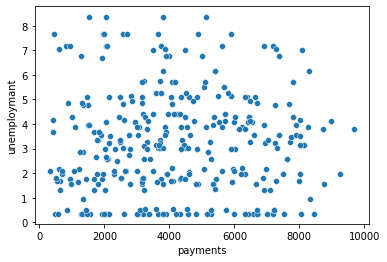

In [65]:
sns.scatterplot(data=temp_all_join_loan_accounts_district, x="payments", y="unemploymant")

In [66]:
#sns.pairplot(
#    temp_all_join_loan_accounts_district,
#    x_vars=["average salary ", "payments", "# transactions", "duration", "amount", "unemploymant"],
#    y_vars=["status", "average salary ", "payments", "# transactions", "duration", "amount", "unemploymant"],
#)

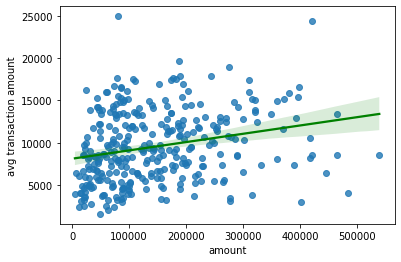

In [67]:
sns.regplot(data=temp_all_join_loan_accounts_district, x='amount', y='avg transaction amount', line_kws={'color': 'g'})

### Disp dataset

In [68]:
disp = pd.read_csv("./raw/disp.csv", sep=";");

In [69]:
disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [70]:
disp.shape

(5369, 4)

In [71]:
# all_join_loan_accounts_district

In [72]:
disp['account_id'].nunique()

4500

In [73]:
disp = disp.rename(columns={"type": "disp_type"})

In [74]:
disp['has_disponent'] = np.where(disp['disp_type'] == 'DISPONENT', True, False)
disp.columns

Index(['disp_id', 'client_id', 'account_id', 'disp_type', 'has_disponent'], dtype='object')

In [75]:
disp

,disp_id,client_id,account_id,disp_type,has_disponent
0,1,1,1,OWNER,False
1,2,2,2,OWNER,False
2,3,3,2,DISPONENT,True
3,4,4,3,OWNER,False
4,5,5,3,DISPONENT,True
...,...,...,...,...,...
5364,13647,13955,11349,OWNER,False
5365,13648,13956,11349,DISPONENT,True
5366,13660,13968,11359,OWNER,False
5367,13663,13971,11362,OWNER,False


In [76]:
has_disponent_temp = disp[disp["has_disponent"]]
has_disponent_temp

,disp_id,client_id,account_id,disp_type,has_disponent
2,3,3,2,DISPONENT,True
4,5,5,3,DISPONENT,True
10,11,11,8,DISPONENT,True
15,16,16,12,DISPONENT,True
17,18,18,13,DISPONENT,True
...,...,...,...,...,...
5329,13140,13448,10940,DISPONENT,True
5332,13161,13469,10954,DISPONENT,True
5346,13350,13658,11111,DISPONENT,True
5352,13443,13751,11186,DISPONENT,True


### Card dataset

In [77]:
cards = pd.read_csv("./processed/card_dev.csv", sep=";");

In [78]:
cards = cards.rename(columns={"type": "card_type"})
cards.columns

Index(['card_id', 'disp_id', 'card_type', 'issued'], dtype='object')

In [79]:
cards.shape

(177, 4)

### Merging Disp and Card datasets by disp_id

In [80]:
disp_card = pd.merge(disp, cards, how="outer")
disp_card.shape

(5369, 8)

In [81]:
disp_card.head()

,disp_id,client_id,account_id,disp_type,has_disponent,card_id,card_type,issued
0,1,1,1,OWNER,False,NaN,NaN,NaN
1,2,2,2,OWNER,False,NaN,NaN,NaN
2,3,3,2,DISPONENT,True,NaN,NaN,NaN
3,4,4,3,OWNER,False,NaN,NaN,NaN
4,5,5,3,DISPONENT,True,NaN,NaN,NaN


In [82]:
# Dropping disp_id. Won't be needed anymore for joins
disp_card = disp_card.drop(columns=['disp_id'])
disp_card

,client_id,account_id,disp_type,has_disponent,card_id,card_type,issued
0,1,1,OWNER,False,NaN,NaN,NaN
1,2,2,OWNER,False,NaN,NaN,NaN
2,3,2,DISPONENT,True,NaN,NaN,NaN
3,4,3,OWNER,False,NaN,NaN,NaN
4,5,3,DISPONENT,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5364,13955,11349,OWNER,False,NaN,NaN,NaN
5365,13956,11349,DISPONENT,True,NaN,NaN,NaN
5366,13968,11359,OWNER,False,1247.0,classic,1995-06-13
5367,13971,11362,OWNER,False,NaN,NaN,NaN


In [83]:
disp_card['disp_type'].describe()

count      5369
unique        2
top       OWNER
freq       4500
Name: disp_type, dtype: object

In [84]:
disp_card_ = disp_card.groupby('account_id').size()

In [85]:
disp_card_.head()

account_id
1    1
2    2
3    2
4    1
5    1
dtype: int64

In [86]:
count_owner_df = pd.DataFrame(disp_card_, columns = ['count_owner'])
count_owner_df

,count_owner
account_id,
1,1
2,2
3,2
4,1
5,1
...,...
11333,1
11349,2
11359,1


### Client dataset

In [87]:
clients = pd.read_csv("./processed/client.csv", sep=";");
clients.shape

(5369, 4)

In [88]:
clients.head()

,client_id,district_id,birthdate,sex
0,1,18,1970-12-13,F
1,2,1,1945-02-04,M
2,3,1,1940-10-09,F
3,4,5,1956-12-01,M
4,5,5,1960-07-03,F


In [89]:
disp_card_clients = pd.merge(disp_card, clients)
disp_card_clients.shape

(5369, 10)

In [90]:
#disp_card_clients.columns

Trying to make sure same account implies same district

In [91]:
#disp_card_clients[disp_card_clients['account_id'] == 17]

In [92]:
#temp_disp_card_clients = np.where(disp['disp_type'] == 'DISPONENT', True, False)
#np.where( (disp_card_clients.account_id.factorize()[0] == disp_card_clients.district_id.factorize()[0]) == False)
#pd.set_option('display.max_rows', None)
temp_disp_card_clients = disp_card_clients.drop(columns=['client_id', 'disp_type', 'has_disponent', 'card_id', 'card_type', 'issued', 'birthdate', 'sex'])
temp_disp_card_clients

,account_id,district_id
0,1,18
1,2,1
2,2,1
3,3,5
4,3,5
...,...,...
5364,11349,1
5365,11349,1
5366,11359,61
5367,11362,67


In [93]:
#for id in temp_disp_card_clients['account_id'].unique():
#  correct_value = temp_disp_card_clients[temp_disp_card_clients['account_id'] == id]['district_id'].value_counts().idxmax()
#  temp_disp_card_clients.loc[temp_disp_card_clients['account_id'] == id, 'same'] = (temp_disp_card_clients[temp_disp_card_clients['account_id'] == id]['district_id'] == correct_value)

In [94]:
#temp_disp_card_clients['same'].describe()

Therefore, same account_id implies same district_id

In [95]:
disp_card_clients = disp_card_clients.drop_duplicates(subset=['account_id'])
disp_card_clients = disp_card_clients.drop(columns=['has_disponent', 'disp_type', 'district_id'])
disp_card_clients

,client_id,account_id,card_id,card_type,issued,birthdate,sex
0,1,1,NaN,NaN,NaN,1970-12-13,F
1,2,2,NaN,NaN,NaN,1945-02-04,M
3,4,3,NaN,NaN,NaN,1956-12-01,M
5,6,4,NaN,NaN,NaN,1919-09-22,M
6,7,5,NaN,NaN,NaN,1929-01-25,M
...,...,...,...,...,...,...,...
5363,13931,11333,NaN,NaN,NaN,1942-01-01,M
5364,13955,11349,NaN,NaN,NaN,1945-10-30,F
5366,13968,11359,1247.0,classic,1995-06-13,1968-04-13,M
5367,13971,11362,NaN,NaN,NaN,1962-10-19,F


In [96]:
# disp_card_clients = disp_card_clients.drop(columns=['client_id'])

In [97]:
# disp_card_clients[] = np.where(disp['disp_type'] == 'DISPONENT', True, False)

In [98]:
# disp_card_clients.groupby('account_id').head()

In [99]:
temp = pd.merge(disp_card_clients, count_owner_df, right_index=True, left_on='account_id', how="outer")
temp

,client_id,account_id,card_id,card_type,issued,birthdate,sex,count_owner
0,1,1,NaN,NaN,NaN,1970-12-13,F,1
1,2,2,NaN,NaN,NaN,1945-02-04,M,2
3,4,3,NaN,NaN,NaN,1956-12-01,M,2
5,6,4,NaN,NaN,NaN,1919-09-22,M,1
6,7,5,NaN,NaN,NaN,1929-01-25,M,1
...,...,...,...,...,...,...,...,...
5363,13931,11333,NaN,NaN,NaN,1942-01-01,M,1
5364,13955,11349,NaN,NaN,NaN,1945-10-30,F,2
5366,13968,11359,1247.0,classic,1995-06-13,1968-04-13,M,1
5367,13971,11362,NaN,NaN,NaN,1962-10-19,F,1


In [100]:
temp['count_owner'].dtypes

dtype('int64')

In [101]:
disp_card_clients['has_disponent'] = np.where(temp['count_owner'] == 2, True, False)
disp_card_clients

,client_id,account_id,card_id,card_type,issued,birthdate,sex,has_disponent
0,1,1,NaN,NaN,NaN,1970-12-13,F,False
1,2,2,NaN,NaN,NaN,1945-02-04,M,True
3,4,3,NaN,NaN,NaN,1956-12-01,M,True
5,6,4,NaN,NaN,NaN,1919-09-22,M,False
6,7,5,NaN,NaN,NaN,1929-01-25,M,False
...,...,...,...,...,...,...,...,...
5363,13931,11333,NaN,NaN,NaN,1942-01-01,M,False
5364,13955,11349,NaN,NaN,NaN,1945-10-30,F,True
5366,13968,11359,1247.0,classic,1995-06-13,1968-04-13,M,False
5367,13971,11362,NaN,NaN,NaN,1962-10-19,F,False


In [102]:
complete_join = pd.merge(all_join_loan_accounts_district, disp_card_clients)
complete_join

,account_id,district_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,...,no. of enterpreneurs per 1000 inhabitants,crimes,unemploymant,client_id,card_id,card_type,issued,birthdate,sex,has_disponent
0,5270,44,monthly issuance,53.0,1.0,0.0,11.0,0.0,31.0,28.0,...,97,2245.5,3.275,6367,NaN,NaN,NaN,1970-04-28,M,False
1,5385,44,weekly issuance,56.0,3.0,0.0,10.0,6.0,27.0,32.0,...,97,2245.5,3.275,6499,NaN,NaN,NaN,1963-02-01,M,False
2,8027,44,weekly issuance,60.0,2.0,0.0,10.0,0.0,38.0,33.0,...,97,2245.5,3.275,9915,NaN,NaN,NaN,1967-07-10,M,False
3,3037,44,monthly issuance,117.0,26.0,0.0,0.0,0.0,71.0,70.0,...,97,2245.5,3.275,3670,NaN,NaN,NaN,1980-09-17,F,False
4,10942,44,weekly issuance,130.0,40.0,0.0,0.0,12.0,62.0,72.0,...,97,2245.5,3.275,13451,NaN,NaN,NaN,1955-11-18,F,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4462,73,weekly issuance,10.0,4.0,0.0,0.0,0.0,3.0,3.0,...,90,4394.0,3.535,5384,NaN,NaN,NaN,1935-07-21,M,False
324,5001,53,monthly issuance,82.0,27.0,0.0,0.0,6.0,39.0,41.0,...,99,1876.5,3.045,6042,NaN,NaN,NaN,1963-10-12,M,False
325,3084,59,weekly issuance,29.0,8.0,0.0,0.0,0.0,15.0,13.0,...,106,2450.0,3.355,3730,NaN,NaN,NaN,1945-08-07,F,False
326,11054,59,weekly issuance,31.0,3.0,0.0,7.0,3.0,12.0,14.0,...,106,2450.0,3.355,13590,NaN,NaN,NaN,1977-08-03,M,False


In [103]:
complete_join = complete_join.drop(columns=['card_id', 'client_id', 'district_id'])
complete_join

,account_id,frequency,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,# type = withdrawal in cash transactions,...,ratio of urban inhabitants,average salary,no. of enterpreneurs per 1000 inhabitants,crimes,unemploymant,card_type,issued,birthdate,sex,has_disponent
0,5270,monthly issuance,53.0,1.0,0.0,11.0,0.0,31.0,28.0,3.0,...,53.0,8254,97,2245.5,3.275,NaN,NaN,1970-04-28,M,False
1,5385,weekly issuance,56.0,3.0,0.0,10.0,6.0,27.0,32.0,1.0,...,53.0,8254,97,2245.5,3.275,NaN,NaN,1963-02-01,M,False
2,8027,weekly issuance,60.0,2.0,0.0,10.0,0.0,38.0,33.0,5.0,...,53.0,8254,97,2245.5,3.275,NaN,NaN,1967-07-10,M,False
3,3037,monthly issuance,117.0,26.0,0.0,0.0,0.0,71.0,70.0,1.0,...,53.0,8254,97,2245.5,3.275,NaN,NaN,1980-09-17,F,False
4,10942,weekly issuance,130.0,40.0,0.0,0.0,12.0,62.0,72.0,2.0,...,53.0,8254,97,2245.5,3.275,NaN,NaN,1955-11-18,F,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4462,weekly issuance,10.0,4.0,0.0,0.0,0.0,3.0,3.0,NaN,...,56.4,8746,90,4394.0,3.535,NaN,NaN,1935-07-21,M,False
324,5001,monthly issuance,82.0,27.0,0.0,0.0,6.0,39.0,41.0,4.0,...,50.9,8240,99,1876.5,3.045,NaN,NaN,1963-10-12,M,False
325,3084,weekly issuance,29.0,8.0,0.0,0.0,0.0,15.0,13.0,2.0,...,62.1,8444,106,2450.0,3.355,NaN,NaN,1945-08-07,F,False
326,11054,weekly issuance,31.0,3.0,0.0,7.0,3.0,12.0,14.0,1.0,...,62.1,8444,106,2450.0,3.355,NaN,NaN,1977-08-03,M,False


In [104]:
complete_join.columns

Index(['account_id', 'frequency', '# transactions',
       '# credit in cash transactions',
       '# credit card withdrawal transactions',
       '# collection from another bank withdrawal transactions',
       '# remittance to another bank withdrawal transactions',
       '# withdrawal in cash transactions', '# type = withdrawal transactions',
       '# type = withdrawal in cash transactions',
       '# type = credit transactions', 'avg transaction amount', 'avg balance',
       'loan_id', 'loan date', 'amount', 'duration', 'payments', 'status',
       'district_name', 'district_region', 'no. of inhabitants',
       'ratio of urban inhabitants ', 'average salary ',
       'no. of enterpreneurs per 1000 inhabitants ', 'crimes', 'unemploymant',
       'card_type', 'issued', 'birthdate', 'sex', 'has_disponent'],
      dtype='object')

In [105]:
complete_join['loan date'].head()

0    1993-11-22
1    1994-04-07
2    1994-06-05
3    1996-04-18
4    1995-10-02
Name: loan date, dtype: object

In [106]:
complete_join['loan date'] = pd.to_datetime(complete_join['loan date'])
complete_join['loan date'].head()

0   1993-11-22
1   1994-04-07
2   1994-06-05
3   1996-04-18
4   1995-10-02
Name: loan date, dtype: datetime64[ns]

In [107]:
complete_join['birthdate'] = pd.to_datetime(complete_join['birthdate'])
complete_join['birthdate'].head()

0   1970-04-28
1   1963-02-01
2   1967-07-10
3   1980-09-17
4   1955-11-18
Name: birthdate, dtype: datetime64[ns]

In [108]:
complete_join['age of loan'] = complete_join['loan date'] - complete_join['birthdate']
complete_join['age of loan']

0      8609 days
1     11388 days
2      9827 days
3      5692 days
4     14563 days
         ...    
323   22213 days
324   12082 days
325   18649 days
326    6957 days
327   21257 days
Name: age of loan, Length: 328, dtype: timedelta64[ns]

In [109]:
# to days
complete_join['age of loan'] = complete_join['age of loan'] / np.timedelta64(1, "D")
complete_join['age of loan']

0       8609.0
1      11388.0
2       9827.0
3       5692.0
4      14563.0
        ...   
323    22213.0
324    12082.0
325    18649.0
326     6957.0
327    21257.0
Name: age of loan, Length: 328, dtype: float64

In [110]:
complete_join['age of loan'] / 365.25

0      23.570157
1      31.178645
2      26.904860
3      15.583847
4      39.871321
         ...    
323    60.815880
324    33.078713
325    51.058179
326    19.047228
327    58.198494
Name: age of loan, Length: 328, dtype: float64

In [111]:
complete_join = complete_join.rename(columns={"frequency": " account issuance freq", "amount": "loan amount", "duration": "loan duration", "payments": "loan payments", "age of loan": "age at loan"})

In [112]:
complete_join = complete_join.drop(columns=['issued'])

In [113]:
complete_join.shape

(328, 32)

In [114]:
# only 5 row appear due to being the default number for head()
complete_join.head()

,account_id,account issuance freq,# transactions,# credit in cash transactions,# credit card withdrawal transactions,# collection from another bank withdrawal transactions,# remittance to another bank withdrawal transactions,# withdrawal in cash transactions,# type = withdrawal transactions,# type = withdrawal in cash transactions,...,ratio of urban inhabitants,average salary,no. of enterpreneurs per 1000 inhabitants,crimes,unemploymant,card_type,birthdate,sex,has_disponent,age at loan
0,5270,monthly issuance,53.0,1.0,0.0,11.0,0.0,31.0,28.0,3.0,...,53.0,8254,97,2245.5,3.275,NaN,1970-04-28,M,False,8609.0
1,5385,weekly issuance,56.0,3.0,0.0,10.0,6.0,27.0,32.0,1.0,...,53.0,8254,97,2245.5,3.275,NaN,1963-02-01,M,False,11388.0
2,8027,weekly issuance,60.0,2.0,0.0,10.0,0.0,38.0,33.0,5.0,...,53.0,8254,97,2245.5,3.275,NaN,1967-07-10,M,False,9827.0
3,3037,monthly issuance,117.0,26.0,0.0,0.0,0.0,71.0,70.0,1.0,...,53.0,8254,97,2245.5,3.275,NaN,1980-09-17,F,False,5692.0
4,10942,weekly issuance,130.0,40.0,0.0,0.0,12.0,62.0,72.0,2.0,...,53.0,8254,97,2245.5,3.275,NaN,1955-11-18,F,False,14563.0


In [115]:
complete_join.dtypes

account_id                                                         int64
 account issuance freq                                            object
# transactions                                                   float64
# credit in cash transactions                                    float64
# credit card withdrawal transactions                            float64
# collection from another bank withdrawal transactions           float64
# remittance to another bank withdrawal transactions             float64
# withdrawal in cash transactions                                float64
# type = withdrawal transactions                                 float64
# type = withdrawal in cash transactions                         float64
# type = credit transactions                                     float64
avg transaction amount                                           float64
avg balance                                                      float64
loan_id                                            

# Summary - Columns of final dataframe per table:
    account.csv
        + account_id
        - district_id
        + frequency
        - date
    card_dev.csv
        - card_id
        - disp_id
        + type
        - issued (date)
    client.csv
        - client_id
        - district_id
        + birthdate
        + sex
    disp.csv
        - disp_id
        - client_id
        - account_id
        - type       - > + has disponent (True/False)
    district.csv
        - code
        + name
        + region
        + no. of inhabitants
        - no. of municipalities with inhabitants < 499 
        - no. of municipalities with inhabitants 500-1999
        - no. of municipalities with inhabitants 2000-9999
        - no. of municipalities with inhabitants >10000
        - no. of cities
        + ratio of urban inhabitants
        + average salary
        - unemploymant rate '95
        - unemploymant rate '96       - > + unemploymant (avg of 95'/96')
        + no. of enterpreneurs per 1000 inhabitants
        - no. of commited crimes '95
        - no. of commited crimes '96  - > + crimes (avg of 95'/96')
    loan_dev.csv
        - loan_id
        - account_id
        - date      - > + age at the time of loan (age at loan)
        + amount
        + duration
        + payments
        + status
    trans_dev.csv
        - trans_id
        - account_id
        - date
        - type      - > + number of transactions per transaction 'type'
        - operation - > + number of transactions and operation 'type'
        - amount    - > + avg transaction amount
        - balance   - > + avg of balance
        - k_symbol
        - bank
        - account

In [116]:
complete_join['new status'] = complete_join['status'].replace({-1: True, 1: False})
complete_join['new status']

0      False
1      False
2      False
3       True
4      False
       ...  
323     True
324    False
325     True
326    False
327    False
Name: new status, Length: 328, dtype: bool

In [117]:
complete_join['status']

0      1
1      1
2      1
3     -1
4      1
      ..
323   -1
324    1
325   -1
326    1
327    1
Name: status, Length: 328, dtype: int64

In [118]:
#complete_join.to_csv("./processed/complete_join_comp_loan_id.csv", sep=";")

In [119]:
#complete_join.to_csv("./processed/complete_join_dev_loan_id.csv", sep=";")